In [126]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import cross_validation, svm
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import cm


In [2]:
def handle_non_numerical_data(df):
    columns = df.columns.values    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            
            df[column] = list(map(convert_to_int,df[column]))
            
    return df

In [93]:


'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

df = pd.read_csv(r'c:\Users\15764\Documents\Datasets\titanic\train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df.drop(['Name','Ticket','Embarked','Parch','SibSp'],1, inplace=True)

In [95]:
df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [96]:
#df.fillna(0,inplace=True)
vdf =df.dropna(axis=0,how='any').copy()
df.fillna(-99999,inplace=True)  ; df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,,
1,0,3,male,22.0,7.2500,-99999
2,1,1,female,38.0,71.2833,C85
3,1,3,female,26.0,7.9250,-99999
4,1,1,female,35.0,53.1000,C123
5,0,3,male,35.0,8.0500,-99999


In [98]:
vdf = handle_non_numerical_data(vdf)
df = handle_non_numerical_data(df) ; df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,,
1,0,3,1,22.0,7.2500,97
2,1,1,0,38.0,71.2833,102
3,1,3,0,26.0,7.9250,97
4,1,1,0,35.0,53.1000,29
5,0,3,1,35.0,8.0500,97


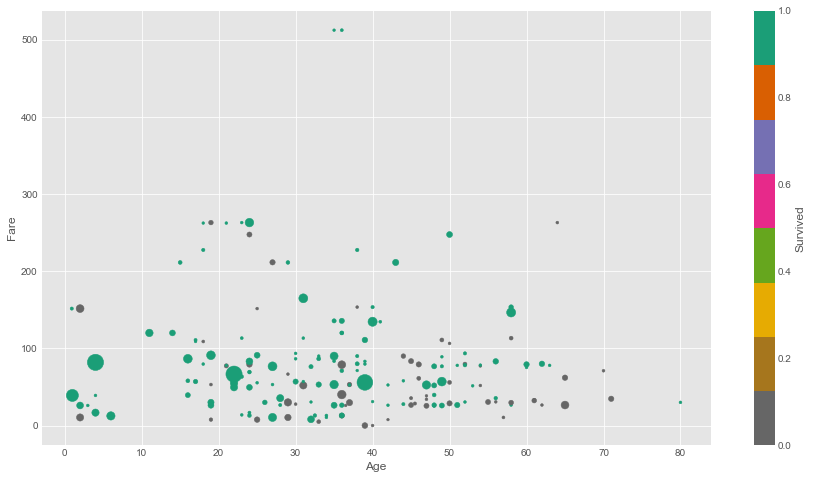

In [141]:
ax = vdf.plot('Age','Fare',kind='scatter',c='Survived',colormap=cm.Dark2_r,s=df['Fare'],figsize=(15,8),sharex=False)

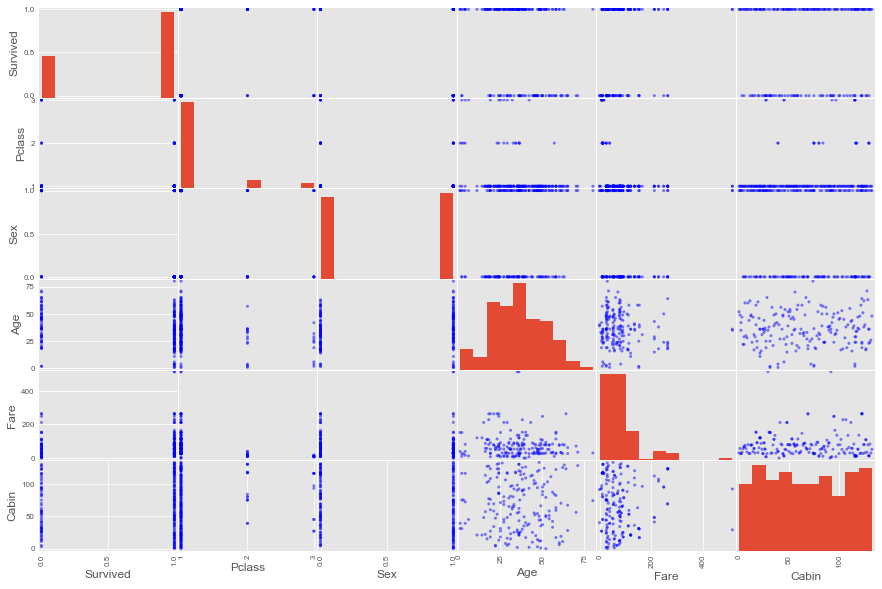

In [147]:
pd.plotting.scatter_matrix(vdf,figsize=(15,10),c='blue');

C:\Users\15764\AppData\Local\Continuum\anaconda2\envs\py3\lib\site-packages\matplotlib\cbook\__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


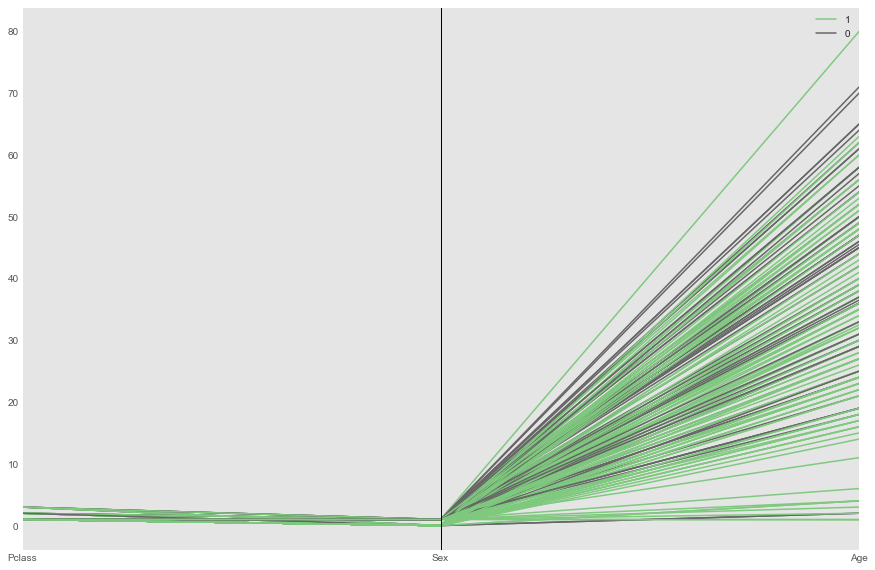

In [161]:
plt.figure(figsize=(15,10))
ax =pd.plotting.parallel_coordinates(vdf.drop(columns=['Fare','Cabin']),c='blue',class_column="Survived",colormap=cm.Accent)
#ax.set_ylim([0,50])

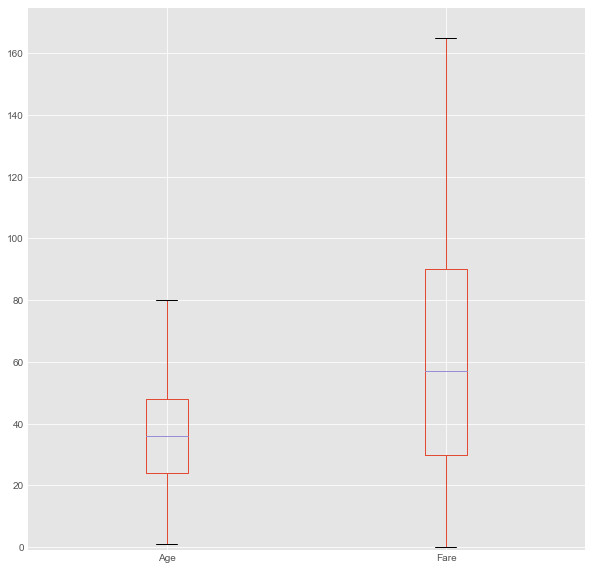

In [175]:
ax= vdf[['Age','Fare']].plot.box(figsize=(10,10))
ax.set_ylim([-1,175]);

In [ ]:
import seaborn as sns

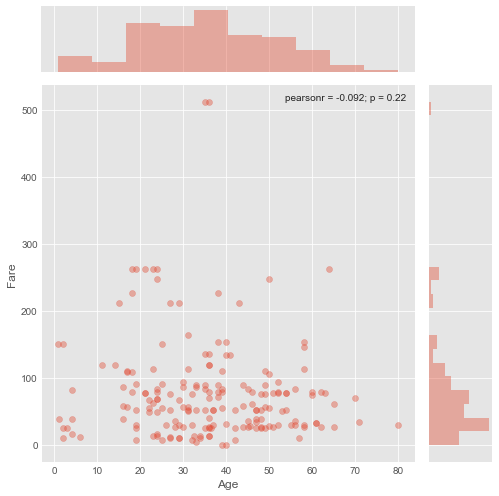

In [190]:
sns.jointplot(vdf['Age'],vdf['Fare'],alpha=0.4,size=7);

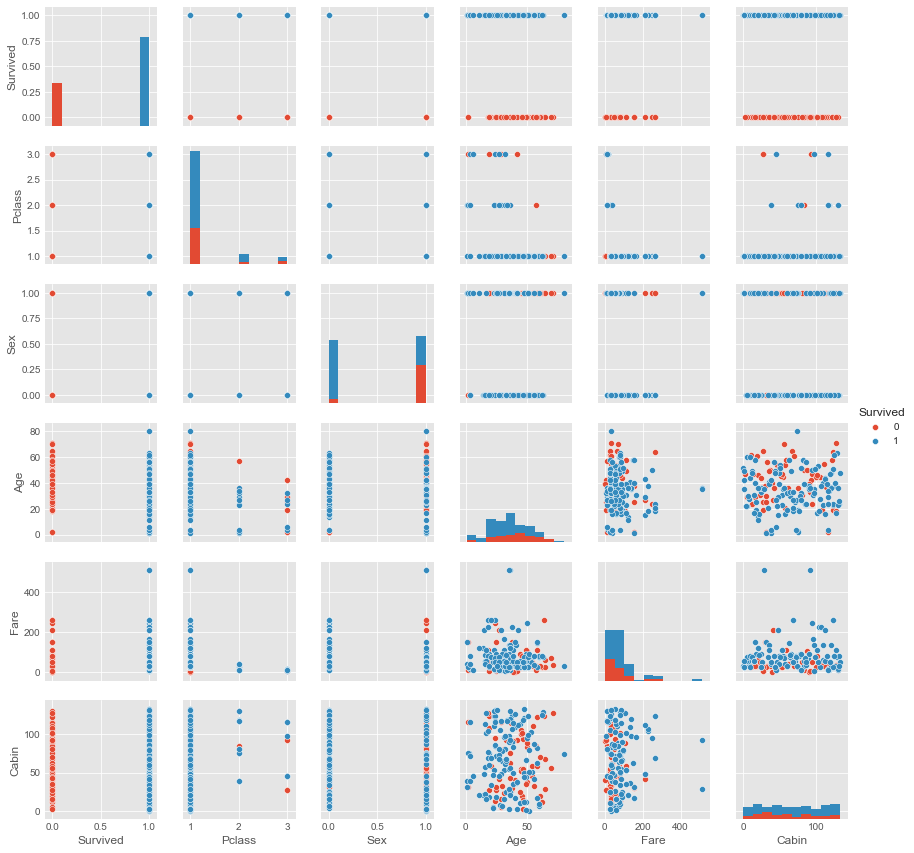

In [194]:
sns.pairplot(vdf, hue='Survived', size=2);

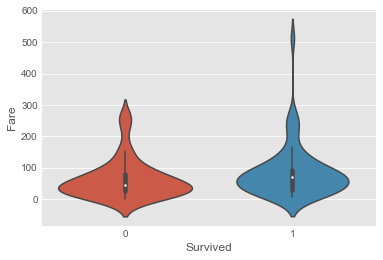

In [196]:
sns.violinplot('Survived', 'Fare', data=vdf);

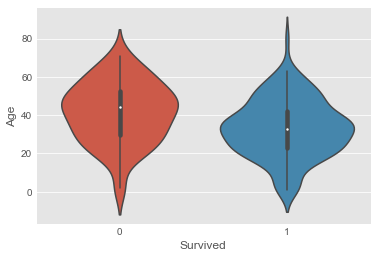

In [197]:
sns.violinplot('Survived', 'Age', data=vdf);

In [9]:
X = np.array(df.drop(['Survived'],1).astype(float)) 
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [10]:
Y = np.array(df['Survived'])

In [259]:
# compare kmean , knn and svm
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


#Select the best model
knn = KNeighborsClassifier()
clf_svm = svm.SVC(probability=True)
logreg = LogisticRegression()
clfs = [knn,clf_svm,logreg]

for clf in clfs:
    print(cross_val_score(clf, X, Y, cv=10, scoring='accuracy').mean())

0.783440301895358
0.7923916127567814
0.7822287481557145


In [260]:
C_range = list(range(1,1100,10))
k_scores = []
for c in C_range:
    clf_svm = svm.SVC(C=c)
    scores = cross_val_score(clf_svm, X, Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [261]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Cross-Validated Accuracy')

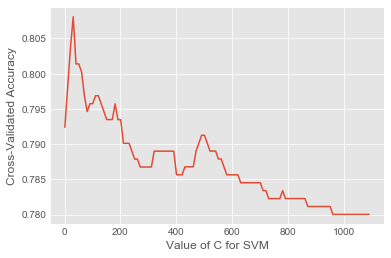

In [262]:
plt.plot(C_range,k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [263]:
C_range[k_scores.index(max(k_scores))]

31

In [264]:
param_grid= dict(C=C_range)
grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy',n_jobs=-1)

In [265]:
grid.fit(X, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1091, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511, 521, 531, 541, 551, 561, 571, 581...921, 931, 941, 951, 961, 971, 981, 991, 1001, 1011, 1021, 1031, 1041, 1051, 1061, 1071, 1081, 1091]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [266]:
print(grid.grid_scores_[0:2])
# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

[mean: 0.79237, std: 0.03614, params: {'C': 1}, mean: 0.79798, std: 0.03601, params: {'C': 11}]
{'C': 1}
[0.78888889 0.76666667 0.73033708 0.79775281 0.85393258 0.76404494
 0.79775281 0.78651685 0.85393258 0.78409091]
0.792368125701459


In [267]:
print(grid.best_score_)
print(grid.best_params_)

0.8080808080808081
{'C': 31}


In [268]:
#create classifier with mest parameter
clf_svm = svm.SVC(C=grid.best_params_['C'],probability=True)

In [269]:
#Evaluate the model
from sklearn import metrics
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y, test_size=0.2)
clf_svm.fit(X_train,Y_train)
Y_test = pd.Series(Y_test)
accuracy = clf_svm.score(X_test,Y_test)
Y_predict = clf_svm.predict(X_test)
Y_predict_prob = clf_svm.predict_proba(X_test)[:, 1]
print('accuracy= ',accuracy)

#metrics.accurancy_score()

accuracy=  0.8156424581005587


In [234]:
#examine the class distribution of the testing set (using a Pandas Series method)
Y_test.value_counts()

0    119
1     60
dtype: int64

In [236]:
# calculate the percentage of ones
Y_test.mean()

0.33519553072625696

In [237]:
# calculate null accuracy 
max(Y_test.mean(), 1 - Y_test.mean())

0.664804469273743

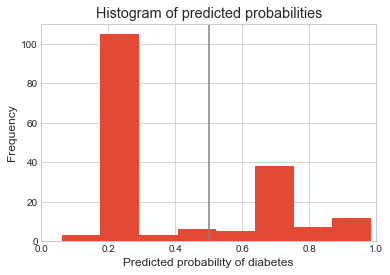

In [278]:
plt.hist(Y_predict_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.axvline(x=0.5,c='grey')

In [250]:
confusion = metrics.confusion_matrix(Y_test, Y_predict); confusion

array([[93,  7],
       [22, 57]], dtype=int64)

In [251]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [246]:
#Classification Accuracy
metrics.accuracy_score(Y_test, Y_predict)

0.8379888268156425

In [247]:
#Classification Error
1 - metrics.accuracy_score(Y_test, Y_predict)

0.16201117318435754

In [248]:
#Sensitivity
metrics.recall_score(Y_test, Y_predict)

0.7215189873417721

In [252]:
#Specificity
print(TN / float(TN + FP))

0.93


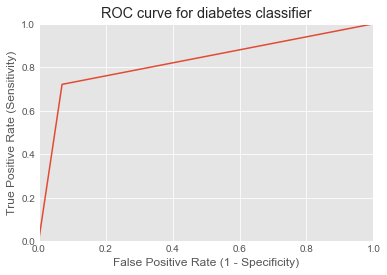

In [254]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [255]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [258]:
evaluate_threshold(0.3)

Sensitivity: 0.7215189873417721
Specificity: 0.9299999999999999


In [256]:
metrics.roc_auc_score(Y_test, Y_predict)

0.825759493670886

In [210]:
test_df = pd.read_csv(r'c:\Users\15764\Documents\Datasets\titanic\test.csv', index_col=0) ; test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [211]:
test_df.drop(['Name','Ticket','Embarked','Parch','SibSp'],1, inplace=True)

In [212]:
test_df.fillna(-99999,inplace=True)
test_df = handle_non_numerical_data(test_df) ; test_df.head()

,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,
892,3,1,34.5,7.8292,63
893,3,0,47.0,7.0000,63
894,2,1,62.0,9.6875,63
895,3,1,27.0,8.6625,63
896,3,0,22.0,12.2875,63


In [213]:
nX = np.array(test_df.astype(float)) 
nX = scaler.transform(nX) ; nX.shape

(418, 5)

In [216]:
res = clf_svm.predict(nX) ; len(res)

418

In [217]:
test_df['Survived'] = pd.Series(res, index = test_df.index)

In [218]:
res_df = pd.DataFrame(test_df.loc[:,'Survived']) ; res_df.head()

,Survived
PassengerId,
892,1
893,1
894,1
895,1
896,1


In [219]:
res_df.to_csv(r'c:\Users\15764\Documents\Datasets\titanic\res.csv')